<a href="https://colab.research.google.com/github/sivanv0576/CapstoneNLPSep2B/blob/master/Automated_Ticket_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Data set**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Explorary Data Analysis**

In [3]:
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Dataset/input_data.xlsx')
print(df.shape)

(8500, 4)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [6]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [7]:
df.tail()

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49


In [8]:
df.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


**There are 74 unique assignment groups in the data sets**

**Plotting number of tickets against group**

Text(0, 0.5, 'No.of tickets')

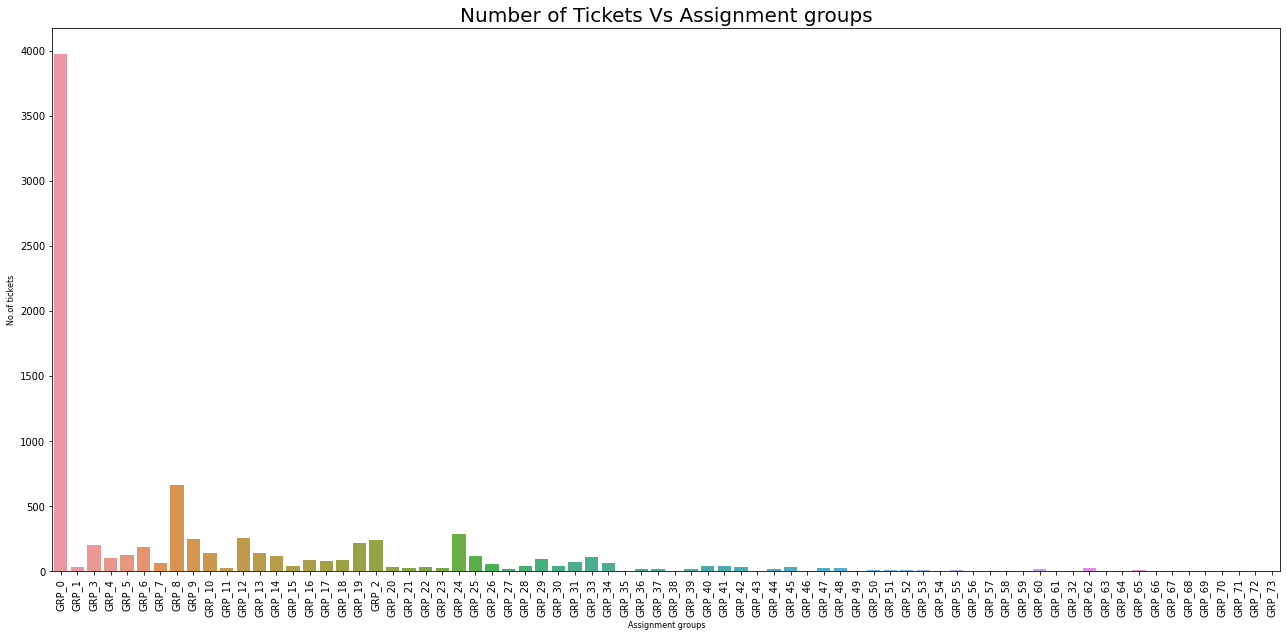

In [9]:
plt.figure(figsize=(22,10))
sns.countplot("Assignment group",data=df)
plt.xticks(rotation=90)
plt.title("Number of Tickets Vs Assignment groups",fontsize=20)
plt.xlabel("Assignment groups",fontsize=8)
plt.ylabel("No.of tickets",fontsize=8)

**GRP_0 has significantly higher than the other groups in number of records**

In [10]:
dict(df['Assignment group'].value_counts())

{'GRP_0': 3976,
 'GRP_1': 31,
 'GRP_10': 140,
 'GRP_11': 30,
 'GRP_12': 257,
 'GRP_13': 145,
 'GRP_14': 118,
 'GRP_15': 39,
 'GRP_16': 85,
 'GRP_17': 81,
 'GRP_18': 88,
 'GRP_19': 215,
 'GRP_2': 241,
 'GRP_20': 36,
 'GRP_21': 29,
 'GRP_22': 31,
 'GRP_23': 25,
 'GRP_24': 289,
 'GRP_25': 116,
 'GRP_26': 56,
 'GRP_27': 18,
 'GRP_28': 44,
 'GRP_29': 97,
 'GRP_3': 200,
 'GRP_30': 39,
 'GRP_31': 69,
 'GRP_32': 4,
 'GRP_33': 107,
 'GRP_34': 62,
 'GRP_35': 1,
 'GRP_36': 15,
 'GRP_37': 16,
 'GRP_38': 3,
 'GRP_39': 19,
 'GRP_4': 100,
 'GRP_40': 45,
 'GRP_41': 40,
 'GRP_42': 37,
 'GRP_43': 5,
 'GRP_44': 15,
 'GRP_45': 35,
 'GRP_46': 6,
 'GRP_47': 27,
 'GRP_48': 25,
 'GRP_49': 6,
 'GRP_5': 129,
 'GRP_50': 14,
 'GRP_51': 8,
 'GRP_52': 9,
 'GRP_53': 11,
 'GRP_54': 2,
 'GRP_55': 8,
 'GRP_56': 3,
 'GRP_57': 2,
 'GRP_58': 3,
 'GRP_59': 6,
 'GRP_6': 184,
 'GRP_60': 20,
 'GRP_61': 1,
 'GRP_62': 25,
 'GRP_63': 3,
 'GRP_64': 1,
 'GRP_65': 11,
 'GRP_66': 4,
 'GRP_67': 1,
 'GRP_68': 3,
 'GRP_69': 2,
 'GRP_7'

In [11]:
df.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

# **Data Pre-processing**

**Analysis of short description column**

In [12]:
# To display full length value of columns
pd.set_option('display.max_colwidth',None)   

In [13]:
# Short desccription length
df['short_desc_len'] = df['Short description'].astype(str).apply(len)

# Number of words in each Short description
df['short_des_word_count'] = df['Short description'].apply(lambda x: len(str(x).split()))
df.head()

,Short description,Description,Caller,Assignment group,short_desc_len,short_des_word_count
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,11,2
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,7,1
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,18,5
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,29,5
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,12,2


**Characteristics of Short Description column**

In [14]:
print ('Maximum Word count in a single record', df['short_des_word_count'].max())
print ('Minimum Word count in a single record ', df['short_des_word_count'].min())
print ('Average Word count in a single record ', df['short_des_word_count'].mean())

Maximum Word count in a single record 28
Minimum Word count in a single record  1
Average Word count in a single record  6.9282352941176475


In [15]:
print ('Maximum length of single record  ', df['short_desc_len'].max())
print ('Minimum length of single record ', df['short_desc_len'].min())
print ('Average length of single record ', df['short_desc_len'].mean())

Maximum length of single record   159
Minimum length of single record  1
Average length of single record  47.22188235294118


In [16]:
#Total words in 'Short Description'
tot_words_short_desc = list(df['Short description'].str.lower().str.split(' ', expand=True).stack().unique())
print ('Total words ', len(tot_words_short_desc))

Total words  10571


**Analysis of Description column**

In [17]:
# Description Length
df['Desc_len'] = df['Description'].astype(str).apply(len)

# creating a column in the dataframe for the number of words
df['Des_word_count'] = df['Description'].apply(lambda x: len(str(x).split(" ")))
df.head(5)

,Short description,Description,Caller,Assignment group,short_desc_len,short_des_word_count,Desc_len,Des_word_count
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,11,2,206,29
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,7,1,194,23
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,18,5,87,9
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,29,5,29,5
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,12,2,12,3


**Characteristics of Description column**

In [18]:
print ('Maximum Word count', df['Des_word_count'].max())
print ('Minimum Word count ', df['Des_word_count'].min())
print ('Average Word count ', df['Des_word_count'].mean())

Maximum Word count 1417
Minimum Word count  1
Average Word count  28.877294117647057


In [19]:
print ('Maximum length ', df['Desc_len'].max())
print ('Minimum length ', df['Desc_len'].min())
print ('Average length`', df['Desc_len'].mean())

Maximum length  13001
Minimum length  1
Average length` 204.02823529411765


In [20]:
#Total words in 'Description' column
total_no_words = list(df['Description'].str.lower().str.split(' ', expand=True).stack().unique())
print ('Total words in Description Column', len(total_no_words ))

Total words in Description Column 35024
